# 12 Jan - Word2Vec

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

### 1. Loading Data

In [2]:
#define the training corpus
#I use the Inaugural Address Corpus from NLTK
import nltk
from nltk.corpus import inaugural
corpus = nltk.corpus.inaugural.sents()

In [3]:
corpus

[['Fellow', '-', 'Citizens', 'of', 'the', 'Senate', 'and', 'of', 'the', 'House', 'of', 'Representatives', ':'], ['Among', 'the', 'vicissitudes', 'incident', 'to', 'life', 'no', 'event', 'could', 'have', 'filled', 'me', 'with', 'greater', 'anxieties', 'than', 'that', 'of', 'which', 'the', 'notification', 'was', 'transmitted', 'by', 'your', 'order', ',', 'and', 'received', 'on', 'the', '14th', 'day', 'of', 'the', 'present', 'month', '.'], ...]

In [4]:
len(corpus)

5220

In [5]:
#the corpus is already tokenized
#convert the words in the corpus into lower case
corpus_tokenized = [[]] * len(corpus)
for i in range(len(corpus)):
    corpus_tokenized[i] = [word.lower() for word in corpus[i]]

print(corpus_tokenized[:5])

[['fellow', '-', 'citizens', 'of', 'the', 'senate', 'and', 'of', 'the', 'house', 'of', 'representatives', ':'], ['among', 'the', 'vicissitudes', 'incident', 'to', 'life', 'no', 'event', 'could', 'have', 'filled', 'me', 'with', 'greater', 'anxieties', 'than', 'that', 'of', 'which', 'the', 'notification', 'was', 'transmitted', 'by', 'your', 'order', ',', 'and', 'received', 'on', 'the', '14th', 'day', 'of', 'the', 'present', 'month', '.'], ['on', 'the', 'one', 'hand', ',', 'i', 'was', 'summoned', 'by', 'my', 'country', ',', 'whose', 'voice', 'i', 'can', 'never', 'hear', 'but', 'with', 'veneration', 'and', 'love', ',', 'from', 'a', 'retreat', 'which', 'i', 'had', 'chosen', 'with', 'the', 'fondest', 'predilection', ',', 'and', ',', 'in', 'my', 'flattering', 'hopes', ',', 'with', 'an', 'immutable', 'decision', ',', 'as', 'the', 'asylum', 'of', 'my', 'declining', 'years', '--', 'a', 'retreat', 'which', 'was', 'rendered', 'every', 'day', 'more', 'necessary', 'as', 'well', 'as', 'more', 'dear',

In [6]:
#remove stop words with SpaCy
import spacy
nlp = spacy.load("en_core_web_sm")
stopwords = nlp.Defaults.stop_words

for sentence in corpus_tokenized:
    for word in sentence[:]:
        if word in stopwords:
            sentence.remove(word)

print(corpus_tokenized[:5])

[['fellow', '-', 'citizens', 'senate', 'house', 'representatives', ':'], ['vicissitudes', 'incident', 'life', 'event', 'filled', 'greater', 'anxieties', 'notification', 'transmitted', 'order', ',', 'received', '14th', 'day', 'present', 'month', '.'], ['hand', ',', 'summoned', 'country', ',', 'voice', 'hear', 'veneration', 'love', ',', 'retreat', 'chosen', 'fondest', 'predilection', ',', ',', 'flattering', 'hopes', ',', 'immutable', 'decision', ',', 'asylum', 'declining', 'years', '--', 'retreat', 'rendered', 'day', 'necessary', 'dear', 'addition', 'habit', 'inclination', ',', 'frequent', 'interruptions', 'health', 'gradual', 'waste', 'committed', 'time', '.'], ['hand', ',', 'magnitude', 'difficulty', 'trust', 'voice', 'country', 'called', ',', 'sufficient', 'awaken', 'wisest', 'experienced', 'citizens', 'distrustful', 'scrutiny', 'qualifications', ',', 'overwhelm', 'despondence', '(', 'inheriting', 'inferior', 'endowments', 'nature', 'unpracticed', 'duties', 'civil', 'administration', 

In [7]:
#remove punctutations with String
import string
punctutations = string.punctuation

for sentence in corpus_tokenized:
    for word in sentence[:]:
        if word in punctutations:
            sentence.remove(word)

print(corpus_tokenized[:5])

[['fellow', 'citizens', 'senate', 'house', 'representatives'], ['vicissitudes', 'incident', 'life', 'event', 'filled', 'greater', 'anxieties', 'notification', 'transmitted', 'order', 'received', '14th', 'day', 'present', 'month'], ['hand', 'summoned', 'country', 'voice', 'hear', 'veneration', 'love', 'retreat', 'chosen', 'fondest', 'predilection', 'flattering', 'hopes', 'immutable', 'decision', 'asylum', 'declining', 'years', '--', 'retreat', 'rendered', 'day', 'necessary', 'dear', 'addition', 'habit', 'inclination', 'frequent', 'interruptions', 'health', 'gradual', 'waste', 'committed', 'time'], ['hand', 'magnitude', 'difficulty', 'trust', 'voice', 'country', 'called', 'sufficient', 'awaken', 'wisest', 'experienced', 'citizens', 'distrustful', 'scrutiny', 'qualifications', 'overwhelm', 'despondence', 'inheriting', 'inferior', 'endowments', 'nature', 'unpracticed', 'duties', 'civil', 'administration', 'ought', 'peculiarly', 'conscious', 'deficiencies'], ['conflict', 'emotions', 'dare',

In [8]:
#remove '--'
for sentence in corpus_tokenized:
    for word in sentence[:]:
        if word == '--':
            sentence.remove(word)

print(corpus_tokenized[:5])

[['fellow', 'citizens', 'senate', 'house', 'representatives'], ['vicissitudes', 'incident', 'life', 'event', 'filled', 'greater', 'anxieties', 'notification', 'transmitted', 'order', 'received', '14th', 'day', 'present', 'month'], ['hand', 'summoned', 'country', 'voice', 'hear', 'veneration', 'love', 'retreat', 'chosen', 'fondest', 'predilection', 'flattering', 'hopes', 'immutable', 'decision', 'asylum', 'declining', 'years', 'retreat', 'rendered', 'day', 'necessary', 'dear', 'addition', 'habit', 'inclination', 'frequent', 'interruptions', 'health', 'gradual', 'waste', 'committed', 'time'], ['hand', 'magnitude', 'difficulty', 'trust', 'voice', 'country', 'called', 'sufficient', 'awaken', 'wisest', 'experienced', 'citizens', 'distrustful', 'scrutiny', 'qualifications', 'overwhelm', 'despondence', 'inheriting', 'inferior', 'endowments', 'nature', 'unpracticed', 'duties', 'civil', 'administration', 'ought', 'peculiarly', 'conscious', 'deficiencies'], ['conflict', 'emotions', 'dare', 'aver

In [9]:
#get unique words
flatten = lambda l: [item for sublist in l for item in sublist]
vocabs = list(set(flatten(corpus_tokenized)))

print(len(vocabs))

9019


In [10]:
#numericalize the words
word2index = {w: i for i, w in enumerate(vocabs)}

word2index

{'equality': 0,
 'treason': 1,
 'habits': 2,
 'respecting': 3,
 'freeman': 4,
 'islamic': 5,
 'wily': 6,
 'undertone': 7,
 'spring': 8,
 'pressing': 9,
 'premium': 10,
 'pushing': 11,
 'metallic': 12,
 '125': 13,
 'delusion': 14,
 'momentous': 15,
 'convulsions': 16,
 'commencing': 17,
 'clad': 18,
 'investing': 19,
 'avoidance': 20,
 'suggestion': 21,
 '15th': 22,
 'referendum': 23,
 'tariff': 24,
 'furnishing': 25,
 'attorneys': 26,
 'circle': 27,
 'conscious': 28,
 'supremacy': 29,
 'willingness': 30,
 'menacing': 31,
 'concise': 32,
 'punishments': 33,
 'angel': 34,
 'chiefly': 35,
 'myriad': 36,
 'heretofore': 37,
 'trend': 38,
 'temporary': 39,
 'feet': 40,
 'fears': 41,
 'republics': 42,
 'squander': 43,
 'invoke': 44,
 'congressional': 45,
 'gallant': 46,
 'organizations': 47,
 'boldly': 48,
 'echoes': 49,
 '1873': 50,
 'save': 51,
 'vicissitudes': 52,
 'entitle': 53,
 'promotes': 54,
 'membership': 55,
 'decency': 56,
 'readjustment': 57,
 'macleish': 58,
 'instrument': 59,
 '

In [11]:
#append <UNK>
vocabs.append('<UNK>')
word2index['<UNK>'] = 9019

len(word2index)

9020

### 2. CBOW

#### 2.1. Preparing Training Data

In [12]:
#random batch for CBOW model with generic window size and batch size
def random_batch_cbow(window_size=1, batch_size=1): 
    cbow = []
    for sentence in corpus_tokenized:
        #I include the first word and the last word
        #so that everyword could be a center word
        for i in range(len(sentence)):
            center = word2index[sentence[i]]
            context = []
            context_idx = []
            #group the indices of the context words
            for j in range(window_size):
                context_idx.append(i - window_size + j)
            for k in range(1, window_size + 1):
                context_idx.append(i + k)
            #append the context words based on their indices
            #append <UNK> if there is no word at an index
            for idx in context_idx:
                if idx < 0:
                    context.append(word2index['<UNK>'])
                elif idx >= len(sentence):
                    context.append(word2index['<UNK>'])
                else:
                    context.append(word2index[sentence[idx]])
            cbow.append([context, center])
    
    random_inputs = []
    random_labels = []
    random_index = np.random.choice(range(len(cbow)), batch_size, replace=False)
    for i in random_index:
        random_inputs.append(cbow[i][0])
        random_labels.append([cbow[i][1]])
            
    return np.array(random_inputs), np.array(random_labels)

In [13]:
#test the CBOW method
input_batch, target_batch = random_batch_cbow(2, 10)

print("Input: ", input_batch)
print("Target: ", target_batch)

Input:  [[9019 2619 7206 1191]
 [5267 6972 1929 7281]
 [1068 4087 9019 9019]
 [6196 1456 9019 9019]
 [9019 3160 5314 5008]
 [6411 5854    1 9019]
 [5589 8264 1114 6629]
 [4231  932 4038 1722]
 [9019 9019 4705 1422]
 [9019 9019 5254 5547]]
Target:  [[8936]
 [4080]
 [7485]
 [5963]
 [1313]
 [8541]
 [6629]
 [8283]
 [8960]
 [8417]]


#### 2.2 Model

In [14]:
#CBOW model
class CBOW(nn.Module):
    
    def __init__(self, vocab_size, emb_size):
        super(CBOW,self).__init__()
        self.embedding_center_word = nn.Embedding(vocab_size, emb_size)
        self.embedding_outside_word = nn.Embedding(vocab_size, emb_size)
    
    def forward(self, outside_words, center_words, all_vocabs):
        center_embeds = self.embedding_center_word(center_words)  #[batch_size, 1, emb_size]
        outside_embeds = self.embedding_outside_word(outside_words)  #[batch_size, window_size, emb_size]
        all_embeds    = self.embedding_center_word(all_vocabs)    #[batch_size, vocab_size, emb_size]
        
        scores      = center_embeds.bmm(outside_embeds.transpose(1, 2)).squeeze(2)

        norm_scores = all_embeds.bmm(outside_embeds.transpose(1, 2)).squeeze(2)

        nll = -torch.mean(torch.log(torch.exp(scores)/torch.sum(torch.exp(norm_scores), 1).unsqueeze(1)))
            
        return nll # negative log likelihood

#### 2.3. Training

In [15]:
#set training parameters
vocab_size = len(vocabs)
window_size = 2
batch_size = 10
emb_size = 2
model = CBOW(vocab_size, emb_size)
optimizer = optim.Adam(model.parameters(), lr=0.001)

#convert all vocabs to tensors
def prepare_sequence(vocabs, word2index):
    idxs = list(map(lambda w: word2index[w] if word2index.get(w) is not None else word2index["<UNK>"], vocabs))
    return torch.LongTensor(idxs)

all_vocabs = prepare_sequence(list(vocabs), word2index).expand(batch_size, vocab_size)

#calculate epoch time
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time // 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

#train the model
import time

num_epochs = 500
start = time.time()
for epoch in range(num_epochs):
    
    input_batch, target_batch = random_batch_cbow(window_size, batch_size)
    input_batch  = torch.LongTensor(input_batch)  #[batch_size, 1]
    target_batch = torch.LongTensor(target_batch) #[batch_size, 1]

    optimizer.zero_grad()
    loss = model(input_batch, target_batch, all_vocabs)
    
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        end = time.time()
        epoch_mins, epoch_secs = epoch_time(start, end)

        print(f"Epoch: {epoch + 1} | cost: {loss:.6f} | time: {epoch_mins}m {epoch_secs}s")

Epoch: 100 | cost: 10.112409 | time: 0m 36s
Epoch: 200 | cost: 10.541917 | time: 1m 12s
Epoch: 300 | cost: 10.023646 | time: 1m 46s
Epoch: 400 | cost: 9.915010 | time: 2m 20s
Epoch: 500 | cost: 9.709688 | time: 2m 54s


#### 2.4. Plotting the Embeddings

In [16]:
#get embedding
def get_embed(word):
    try:
        index = word2index[word]
    except:
        index = word2index['<UNK>']
    
    word = torch.LongTensor([index])

    center_embed  = model.embedding_center_word(word)
    outside_embed = model.embedding_outside_word(word)
    
    embed = (center_embed + outside_embed) / 2
    
    return  embed[0][0].item(), embed[0][1].item()

['equality', 'treason', 'habits', 'respecting', 'freeman', 'islamic', 'wily', 'undertone', 'spring', 'pressing', 'premium', 'pushing', 'metallic', '125', 'delusion', 'momentous', 'convulsions', 'commencing', 'clad', 'investing']


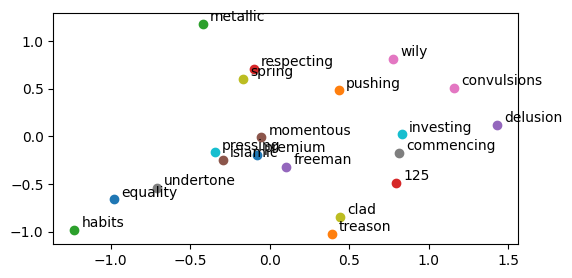

In [17]:
#plot the embeddings of the first 20 vocabs
print(vocabs[:20])

plt.figure(figsize=(6,3))
for i, word in enumerate(vocabs[:20]):
    x, y = get_embed(word)
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2), textcoords='offset points')
plt.show()

#### 2.5. Cosine Similarity

In [18]:
#select a few vocabs and get their embeddings
liberty = get_embed('liberty')
freedom = get_embed('freedom')
democracy = get_embed('democracy')
magic = get_embed('magic')


#define cosine similarity
from numpy import dot
from numpy.linalg import norm

def cos_sim(a, b):
    cos_sim = dot(a, b)/(norm(a)*norm(b))
    return cos_sim

#print cosine similarities between the selected vocabs
print(f"liberty vs. freedom: ", cos_sim(liberty, freedom))
print(f"liberty vs. democracy: ", cos_sim(liberty, democracy))
print(f"liberty vs. magic: ", cos_sim(liberty, magic))

liberty vs. freedom:  -0.3048649683219275
liberty vs. democracy:  0.8976573516699222
liberty vs. magic:  0.2973933634511307


### 3. Skip-gram

#### 3.1. Preparing Traning Data

In [19]:
#random batch for Skip-gram model with generic window size and batch size
def random_batch_skip_gram(window_size=1, batch_size=1): 
    skip_grams = []
    for sentence in corpus_tokenized:
        #I include the first word and the last word
        #so that everyword could be a center word
        for i in range(len(sentence)):
            center = word2index[sentence[i]]
            context = []
            for j in range(window_size):
                if (i - window_size + j) >= 0:
                    context.append(word2index[sentence[i - window_size + j]])
            for k in range(1, window_size + 1):
                if (i + k) < len(sentence):
                    context.append(word2index[sentence[i + k]])
            for w in context:
                skip_grams.append([center, w])
    
    random_inputs = []
    random_labels = []
    random_index = np.random.choice(range(len(skip_grams)), batch_size, replace=False)
    for i in random_index:
        random_inputs.append([skip_grams[i][0]])
        random_labels.append([skip_grams[i][1]])
            
    return np.array(random_inputs), np.array(random_labels)

In [20]:
#test the Skip-gram method
input_batch, target_batch = random_batch_skip_gram(2, 10)

print("Input: ", input_batch)
print("Target: ", target_batch)

Input:  [[2719]
 [2569]
 [6629]
 [2575]
 [8045]
 [3031]
 [5512]
 [2378]
 [4391]
 [8261]]
Target:  [[5963]
 [7380]
 [  44]
 [ 482]
 [1718]
 [2066]
 [8152]
 [5547]
 [3714]
 [2321]]


#### 3.2. Model

In [21]:
#Skip-gram model
class Skipgram(nn.Module):
    
    def __init__(self, vocab_size, emb_size):
        super(Skipgram,self).__init__()
        self.embedding_center_word = nn.Embedding(vocab_size, emb_size)
        self.embedding_outside_word = nn.Embedding(vocab_size, emb_size)
    
    def forward(self, center_words, outside_words, all_vocabs):
        center_embeds = self.embedding_center_word(center_words)  #[batch_size, 1, emb_size]
        outside_embeds = self.embedding_outside_word(outside_words)  #[batch_size, 1, emb_size]
        all_embeds    = self.embedding_outside_word(all_vocabs)    #[batch_size, vocab_size, emb_size]
        
        scores      = outside_embeds.bmm(center_embeds.transpose(1, 2)).squeeze(2)
        #[batch_size, 1, emb_size] @ [batch_size, emb_size, 1] = [batch_size, 1, 1] = [batch_size, 1]

        norm_scores = all_embeds.bmm(center_embeds.transpose(1, 2)).squeeze(2)
        #[batch_size, vocab_size, emb_size] @ [batch_size, emb_size, 1] = [batch_size, vocab_size, 1] = [batch_size, vocab_size]

        nll = -torch.mean(torch.log(torch.exp(scores)/torch.sum(torch.exp(norm_scores), 1).unsqueeze(1))) # log-softmax
        # scalar (loss must be scalar)    
            
        return nll # negative log likelihood

#### 3.3. Training

In [22]:
#set training parameters
vocab_size = len(vocabs)
window_size = 2
batch_size = 10
emb_size = 2
model = Skipgram(vocab_size, emb_size)
optimizer = optim.Adam(model.parameters(), lr=0.001)

#convert all vocabs to tensors
def prepare_sequence(vocabs, word2index):
    idxs = list(map(lambda w: word2index[w] if word2index.get(w) is not None else word2index["<UNK>"], vocabs))
    return torch.LongTensor(idxs)

all_vocabs = prepare_sequence(list(vocabs), word2index).expand(batch_size, vocab_size)

#calculate epoch time
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time // 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

#train the model
import time

num_epochs = 500
start = time.time()
for epoch in range(num_epochs):
    
    input_batch, target_batch = random_batch_skip_gram(window_size, batch_size)
    input_batch  = torch.LongTensor(input_batch)  #[batch_size, 1]
    target_batch = torch.LongTensor(target_batch) #[batch_size, 1]

    optimizer.zero_grad()
    loss = model(input_batch, target_batch, all_vocabs)
    
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        end = time.time()
        epoch_mins, epoch_secs = epoch_time(start, end)

        print(f"Epoch: {epoch + 1} | cost: {loss:.6f} | time: {epoch_mins}m {epoch_secs}s")

Epoch: 100 | cost: 9.246405 | time: 0m 49s
Epoch: 200 | cost: 10.037871 | time: 1m 35s
Epoch: 300 | cost: 9.470583 | time: 2m 24s
Epoch: 400 | cost: 9.176481 | time: 3m 10s
Epoch: 500 | cost: 9.750044 | time: 3m 58s


#### 3.4. Plotting the Embeddings

['equality', 'treason', 'habits', 'respecting', 'freeman', 'islamic', 'wily', 'undertone', 'spring', 'pressing', 'premium', 'pushing', 'metallic', '125', 'delusion', 'momentous', 'convulsions', 'commencing', 'clad', 'investing']


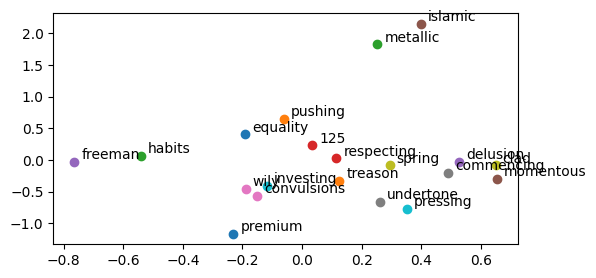

In [23]:
#plot the embeddings of the first 20 vocabs
print(vocabs[:20])

plt.figure(figsize=(6,3))
for i, word in enumerate(vocabs[:20]):
    x, y = get_embed(word)
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2), textcoords='offset points')
plt.show()

#### 3.5. Cosine Similarity

In [24]:
#select a few vocabs and get their embeddings
liberty = get_embed('liberty')
freedom = get_embed('freedom')
democracy = get_embed('democracy')
magic = get_embed('magic')


#define cosine similarity
from numpy import dot
from numpy.linalg import norm

def cos_sim(a, b):
    cos_sim = dot(a, b)/(norm(a)*norm(b))
    return cos_sim

#print cosine similarities between the selected vocabs
print(f"liberty vs. freedom: ", cos_sim(liberty, freedom))
print(f"liberty vs. democracy: ", cos_sim(liberty, democracy))
print(f"liberty vs. magic: ", cos_sim(liberty, magic))

liberty vs. freedom:  0.8872524270701388
liberty vs. democracy:  0.2341180903511953
liberty vs. magic:  -0.973346233928285


### 4. Skip-gram with Negative Sampling

#### 4.1. Unigram Distribution

In [25]:
#count all the occurrences of vocabs
from collections import Counter
word_count = Counter(flatten(corpus_tokenized))

word_count

Counter({'fellow': 158,
         'citizens': 248,
         'senate': 16,
         'house': 12,
         'representatives': 19,
         'vicissitudes': 5,
         'incident': 8,
         'life': 140,
         'event': 16,
         'filled': 6,
         'greater': 54,
         'anxieties': 3,
         'notification': 1,
         'transmitted': 3,
         'order': 66,
         'received': 12,
         '14th': 1,
         'day': 98,
         'present': 86,
         'month': 2,
         'hand': 51,
         'summoned': 6,
         'country': 322,
         'voice': 24,
         'hear': 12,
         'veneration': 5,
         'love': 56,
         'retreat': 9,
         'chosen': 23,
         'fondest': 1,
         'predilection': 1,
         'flattering': 1,
         'hopes': 38,
         'immutable': 3,
         'decision': 14,
         'asylum': 1,
         'declining': 3,
         'years': 143,
         'rendered': 7,
         'necessary': 82,
         'dear': 8,
         'addition': 6,


In [26]:
#count the number of total words
num_total_words = sum([c for w, c in word_count.items()])

num_total_words

58916

In [27]:
#create the unigram table
z = 0.001
unigram_table = []

for v in vocabs:
    unigram_table.extend([v] * int(((word_count[v]/num_total_words)**0.75)/z))

Counter(unigram_table)

Counter({'equality': 3,
         'treason': 1,
         'habits': 1,
         'respecting': 1,
         'spring': 1,
         'tariff': 3,
         'circle': 1,
         'conscious': 1,
         'willingness': 1,
         'heretofore': 2,
         'temporary': 1,
         'fears': 1,
         'republics': 1,
         'invoke': 1,
         'boldly': 1,
         'save': 2,
         'decency': 1,
         'instrument': 3,
         'directed': 1,
         'prompt': 1,
         'divine': 2,
         'theory': 1,
         'elected': 2,
         'parent': 1,
         'looking': 2,
         'attempt': 2,
         'serve': 3,
         'victory': 1,
         'assumed': 1,
         'admitted': 1,
         'vision': 2,
         'agree': 1,
         'prescribed': 2,
         'canal': 1,
         'memory': 1,
         'year': 3,
         'concession': 1,
         'appointed': 1,
         'yield': 1,
         'celebrated': 1,
         'evil': 3,
         'generally': 1,
         'weak': 2,
         '

#### 4.2. Negative Sampling

In [28]:
import random

#convert word indices to tensors
def prepare_sequence(seq, word2index):
    idxs = list(map(lambda w: word2index[w] if word2index.get(w) is not None else word2index["<UNK>"], seq))
    return torch.LongTensor(idxs)

#random_batch for negative sampling method
def negative_sampling(targets, unigram_table, k):
    batch_size = targets.size(0)
    neg_samples = []
    for i in range(batch_size):
        nsample = []
        target_index = targets[i].item()
        while len(nsample) < k: # num of sampling
            neg = random.choice(unigram_table)
            if word2index[neg] == target_index:
                continue
            nsample.append(neg)
        neg_samples.append(prepare_sequence(nsample, word2index).view(1, -1))
    
    return torch.cat(neg_samples)

#test the negative sampling method
input_batch  = torch.Tensor(input_batch)
target_batch = torch.LongTensor(target_batch)

num_neg = 3
negative_sampling(target_batch, unigram_table, num_neg)

tensor([[3638, 7473, 8109],
        [5316, 4983, 3708],
        [7346, 6220, 5703],
        [2599, 3947, 3256],
        [4993, 4258,  575],
        [2633,  209, 6023],
        [7447,  271, 4128],
        [5714, 7206, 1392],
        [6547, 3801, 3038],
        [5725, 7146, 1068]])

#### 4.3. Model

In [29]:
#Skip-gram with negative sampling model
class SkipgramNegSampling(nn.Module):
    
    def __init__(self, vocab_size, emb_size):
        super(SkipgramNegSampling, self).__init__()
        self.embedding_center_word = nn.Embedding(vocab_size, emb_size) # center embedding
        self.embedding_outside_word = nn.Embedding(vocab_size, emb_size) # out embedding
        self.logsigmoid = nn.LogSigmoid()
                    
    def forward(self, input_words, target_words, negative_words):
        input_embeds = self.embedding_center_word(input_words) # [batch_size, 1, emb_size]
        target_embeds = self.embedding_outside_word(target_words) # [batch_size, 1, emb_size]
        neg_embeds    = -self.embedding_outside_word(negative_words) # [batch_size, num_neg, emb_size]
        
        positive_score = target_embeds.bmm(input_embeds.transpose(1, 2)).squeeze(2)
        #[batch_size, 1, emb_size] @ [batch_size, emb_size, 1] = [batch_size, 1, 1] = [batch_size, 1]
        
        negative_score = neg_embeds.bmm(input_embeds.transpose(1, 2))
        #[batch_size, k, emb_size] @ [batch_size, emb_size, 1] = [batch_size, k, 1]
        
        loss = self.logsigmoid(positive_score) + torch.sum(self.logsigmoid(negative_score), 1)
                
        return -torch.mean(loss)
    
    def prediction(self, inputs):
        embeds = self.embedding_center_word(inputs)
        
        return embeds

#### 4.4. Training

In [30]:
#train the model
window_size = 2
batch_size  = 10
emb_size    = 2
model       = SkipgramNegSampling(vocab_size, emb_size)
num_neg     = 10
optimizer   = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 500
start = time.time()
for epoch in range(num_epochs):    
    input_batch, target_batch = random_batch_skip_gram(window_size, batch_size)
    input_batch = torch.LongTensor(input_batch)
    target_batch = torch.LongTensor(target_batch)
    negs_batch = negative_sampling(target_batch, unigram_table, num_neg)
    
    optimizer.zero_grad()   
    loss = model(input_batch, target_batch, negs_batch)
    
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        end = time.time()
        epoch_mins, epoch_secs = epoch_time(start, end)
        print(f"Epoch: {epoch + 1} | cost: {loss:.6f} | time: {epoch_mins}m {epoch_secs}s")

Epoch: 100 | cost: 9.757040 | time: 0m 48s
Epoch: 200 | cost: 9.580683 | time: 1m 37s
Epoch: 300 | cost: 8.272966 | time: 2m 27s
Epoch: 400 | cost: 9.352911 | time: 3m 17s
Epoch: 500 | cost: 10.521797 | time: 4m 6s


#### 4.5. Plotting the Embeddings

['equality', 'treason', 'habits', 'respecting', 'freeman', 'islamic', 'wily', 'undertone', 'spring', 'pressing', 'premium', 'pushing', 'metallic', '125', 'delusion', 'momentous', 'convulsions', 'commencing', 'clad', 'investing']


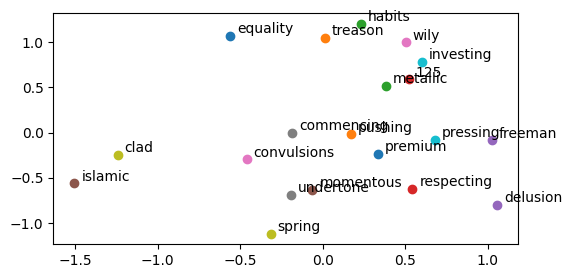

In [31]:
#plot the embeddings of the first 20 vocabs
print(vocabs[:20])

plt.figure(figsize=(6,3))
for i, word in enumerate(vocabs[:20]):
    x, y = get_embed(word)
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2), textcoords='offset points')
plt.show()

#### 4.6. Cosine Similarity

In [32]:
#select a few vocabs and get their embeddings
liberty = get_embed('liberty')
freedom = get_embed('freedom')
democracy = get_embed('democracy')
magic = get_embed('magic')


#define cosine similarity
from numpy import dot
from numpy.linalg import norm

def cos_sim(a, b):
    cos_sim = dot(a, b)/(norm(a)*norm(b))
    return cos_sim

#print cosine similarities between the selected vocabs
print(f"liberty vs. freedom: ", cos_sim(liberty, freedom))
print(f"liberty vs. democracy: ", cos_sim(liberty, democracy))
print(f"liberty vs. magic: ", cos_sim(liberty, magic))

liberty vs. freedom:  0.2111596417609877
liberty vs. democracy:  -0.4454941629184316
liberty vs. magic:  -0.9501928262537006
